This script attemps to develop a model, which predicts if a patient will end up with heart disease using known factors such as: 

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The data can be found on Kaggle.

In [52]:
# import important libraries 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score

In [2]:
#import dataset
data = pd.read_csv('heart-disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# view dataset information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


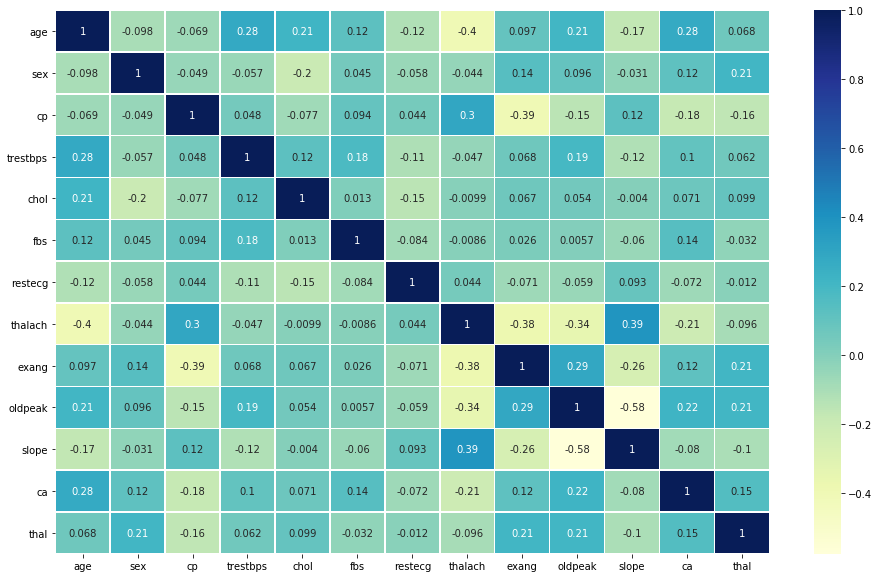

In [18]:
# view data correlation 
fig, ax  = plt.subplots(figsize = (16,10))
ax = sns.heatmap(data.drop(['target'], axis  = 1).corr(), annot = True, cmap = 'YlGnBu', lw=0.5)
plt.yticks(rotation = 0)
plt.savefig("Correlation.png");

#### DATA PREPROCESSING 

In [19]:
from sklearn.preprocessing import StandardScaler 

In [46]:
#select rolls to apply standard scaler 
ndata = data.drop(['sex','fbs','exang', 'target'], axis = 'columns') 
ndata.head()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
0,63,3,145,233,0,150,2.3,0,0,1
1,37,2,130,250,1,187,3.5,0,0,2
2,41,1,130,204,0,172,1.4,2,0,2
3,56,1,120,236,1,178,0.8,2,0,2
4,57,0,120,354,1,163,0.6,2,0,2


In [47]:
#scaling data 
scale  = StandardScaler()
predata = scale.fit_transform(ndata)
predata = pd.DataFrame(predata, columns = ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak',
       'slope', 'ca', 'thal'])
predata.head()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
0,0.952197,1.973123,0.763956,-0.256334,-1.005832,0.015443,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,1.002577,-0.092738,0.072199,0.898962,1.633471,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,0.032031,-0.092738,-0.816773,-1.005832,0.977514,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.032031,-0.663867,-0.198357,0.898962,1.239897,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-0.938515,-0.663867,2.082050,0.898962,0.583939,-0.379244,0.976352,-0.714429,-0.512922


In [49]:
#combine scaled data and the unscaled data 
predata[['sex','fbs','exang','target']] = data[['sex','fbs','exang','target']]
predata.head()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,sex,fbs,exang,target
0,0.952197,1.973123,0.763956,-0.256334,-1.005832,0.015443,1.087338,-2.274579,-0.714429,-2.148873,1,1,0,1
1,-1.915313,1.002577,-0.092738,0.072199,0.898962,1.633471,2.122573,-2.274579,-0.714429,-0.512922,1,0,0,1
2,-1.474158,0.032031,-0.092738,-0.816773,-1.005832,0.977514,0.310912,0.976352,-0.714429,-0.512922,0,0,0,1
3,0.180175,0.032031,-0.663867,-0.198357,0.898962,1.239897,-0.206705,0.976352,-0.714429,-0.512922,1,0,0,1
4,0.290464,-0.938515,-0.663867,2.082050,0.898962,0.583939,-0.379244,0.976352,-0.714429,-0.512922,0,0,1,1


In [62]:
from sklearn.model_selection import train_test_split 
x = predata.drop(['target'], axis = 'columns')
y = predata.target
X_train,X_test,y_train,y_test = train_test_split(x,y, random_state = 0, test_size = 0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

#### MODEL BUILDING 

In [73]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
logreg = log.fit(x,y)
round(log.score(X_train, y_train),2)*100

85.0

In [74]:
#Support Vector Machine 
from sklearn.svm import SVC 
svc = SVC(kernel='rbf',C=30,gamma='auto')
model =  svc.fit(x,y)
round(svc.score(X_train, y_train),2)*100

99.0

In [67]:
#Making predictions with both models 
y_pred_svc = model.predict(X_test)
y_pred_log = logreg.predict(X_test)

#### MODEL ACCURACY 

In [68]:
from sklearn.metrics import confusion_matrix 

In [69]:
# uisng confusion matrix on the result of predictions  
confusion_matrix(y_pred_svc, y_test)

array([[33,  0],
       [ 0, 43]], dtype=int64)

In [70]:
confusion_matrix(y_pred_log, y_test)

array([[24,  3],
       [ 9, 40]], dtype=int64)

#### CONCLUSION